In [42]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency

In [43]:
avito = pd.read_csv('~/OneDrive/Desktop/capstone3/avitofulldata.csv', encoding='utf8', low_memory=False)

In [44]:
avito.head()

,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,activation_date,user_type,deal_probability
0,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400.0,3/28/2017,Private,0.12789
1,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",3000.0,3/26/2017,Private,0.00000
2,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",4000.0,3/20/2017,Private,0.43177
3,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,Продам кресло от0-25кг,2200.0,3/25/2017,Company,0.80323
4,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",Все вопросы по телефону.,40000.0,3/16/2017,Private,0.20797


In [45]:
avito.columns

Index(['region', 'city', 'parent_category_name', 'category_name', 'param_1',
       'param_2', 'param_3', 'title', 'description', 'price',
       'activation_date', 'user_type', 'deal_probability'],
      dtype='object')

In [46]:
avito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   region                1048575 non-null  object 
 1   city                  1048575 non-null  object 
 2   parent_category_name  1048575 non-null  object 
 3   category_name         1048575 non-null  object 
 4   param_1               1005862 non-null  object 
 5   param_2               591604 non-null   object 
 6   param_3               447054 non-null   object 
 7   title                 1048575 non-null  object 
 8   description           967303 non-null   object 
 9   price                 989085 non-null   float64
 10  activation_date       1048575 non-null  object 
 11  user_type             1048575 non-null  object 
 12  deal_probability      1048575 non-null  float64
dtypes: float64(2), object(11)
memory usage: 104.0+ MB


In [47]:
len(avito)

1048575

REGION

In [48]:
deal_probability_region=avito.groupby(['region'])['deal_probability'].mean()
deal_probability_region=deal_probability_region.sort_values().reset_index()

In [49]:
deal_probability_region

,region,deal_probability
0,Красноярский край,0.119938
1,Свердловская область,0.122057
2,Новосибирская область,0.124424
3,Тюменская область,0.125285
4,Ярославская область,0.128717
5,Омская область,0.129879
6,Калининградская область,0.131702
7,Кемеровская область,0.134512
8,Ростовская область,0.134612
9,Алтайский край,0.135934


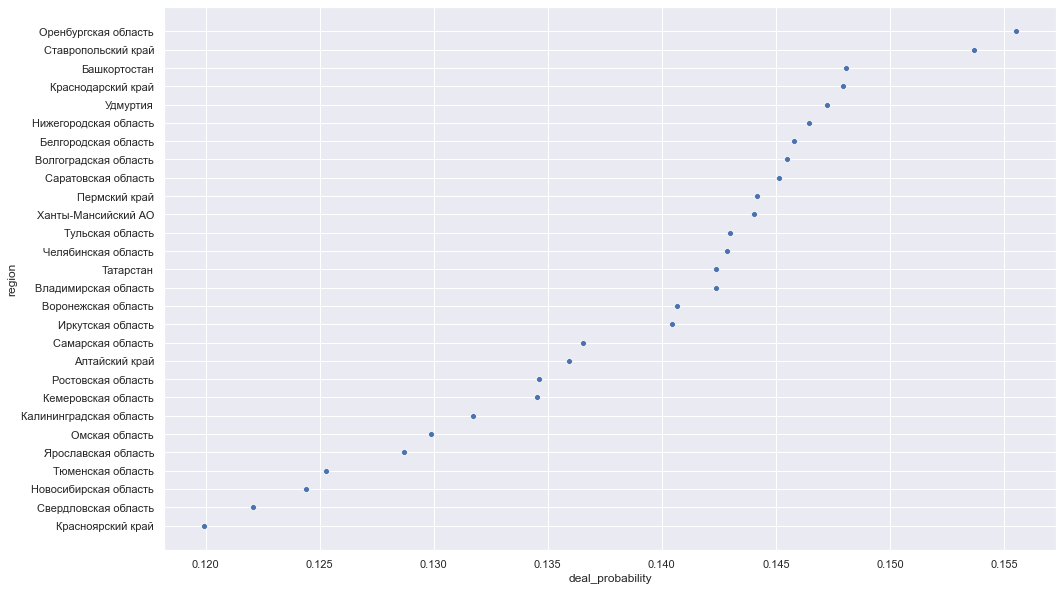

In [50]:
sns.set(rc={'figure.figsize': (16, 10)})
ax = sns.scatterplot(x = 'deal_probability', y = 'region', data = deal_probability_region,
                 palette ='plasma_r', ci = False)

CATEGORIES

In [51]:
#Parent Category 
deal_probability_parent_category=avito.groupby(['parent_category_name'])['deal_probability'].mean()
deal_probability_parent_category=deal_probability_parent_category.sort_values().reset_index()

In [52]:
deal_probability_parent_category

,parent_category_name,deal_probability
0,Личные вещи,0.075961
1,Для бизнеса,0.111464
2,Хобби и отдых,0.123208
3,Недвижимость,0.142019
4,Бытовая электроника,0.174961
5,Для дома и дачи,0.179586
6,Животные,0.236615
7,Транспорт,0.262018
8,Услуги,0.402398


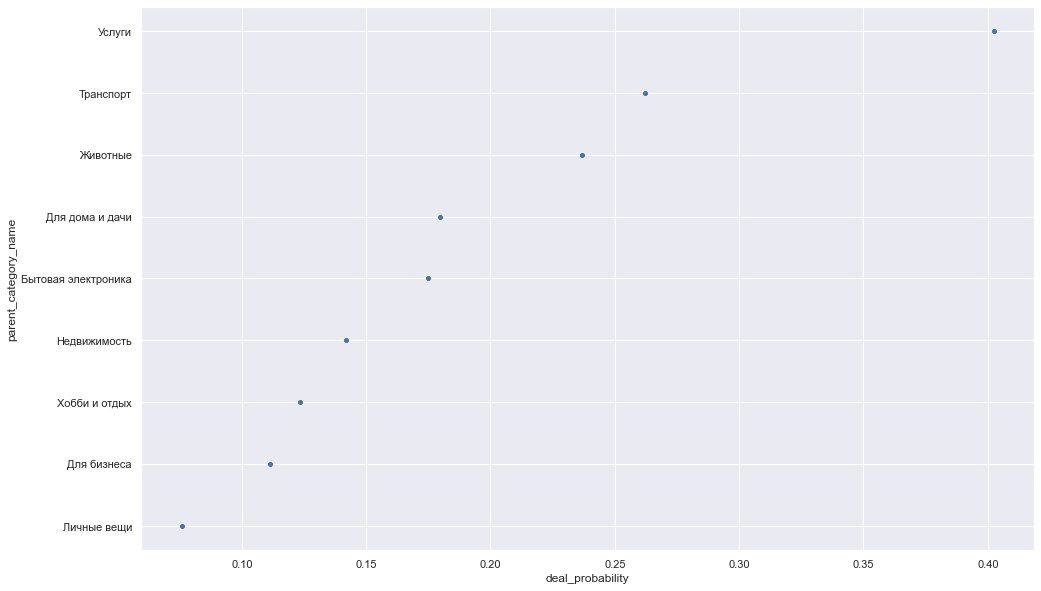

In [53]:
sns.set(rc={'figure.figsize': (16, 10)})
ax = sns.scatterplot(x = 'deal_probability', y = 'parent_category_name', data = deal_probability_parent_category,
                 palette ='plasma_r', ci = False)

In [54]:
#averages by categories
deal_probability_category=avito.groupby(['category_name'])['deal_probability'].mean()
deal_probability_category=deal_probability_category.sort_values().reset_index()

In [55]:
deal_probability_category

,category_name,deal_probability
0,Книги и журналы,0.039989
1,Недвижимость за рубежом,0.045465
2,"Одежда, обувь, аксессуары",0.046197
3,Часы и украшения,0.055634
4,Детская одежда и обувь,0.061146
5,Коллекционирование,0.064212
6,Земельные участки,0.088953
7,Красота и здоровье,0.092908
8,Готовый бизнес,0.097731
9,Посуда и товары для кухни,0.103011


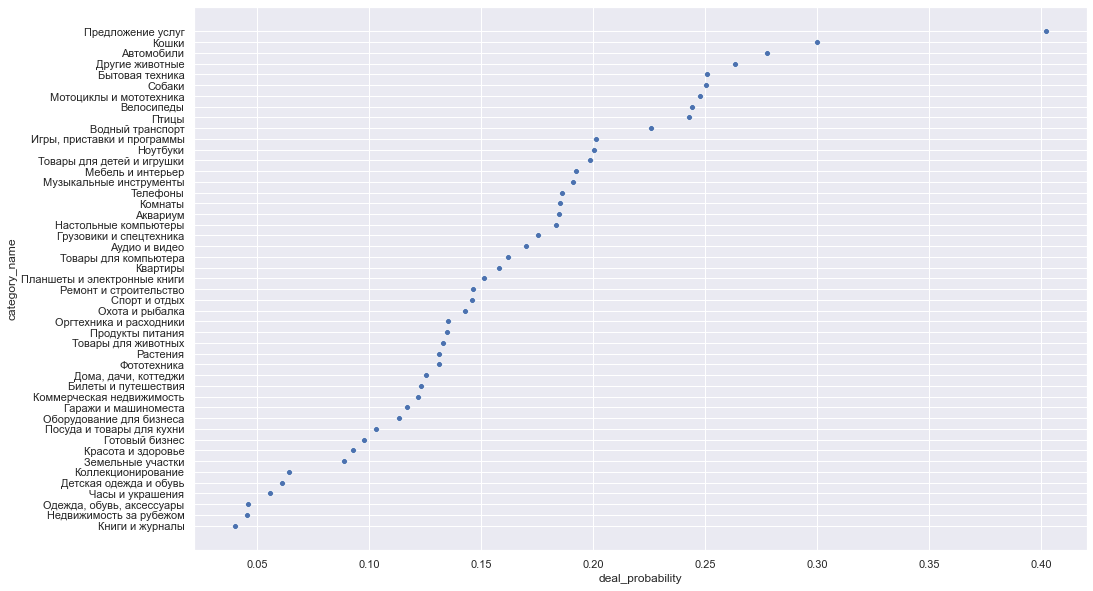

In [56]:
sns.set(rc={'figure.figsize': (16, 10)})
ax = sns.scatterplot(x = 'deal_probability', y = 'category_name', data = deal_probability_category,
                 palette ='plasma_r', ci = False)

In [57]:
deal_category_more=deal_probability_category[deal_probability_category['deal_probability']>=0.2]

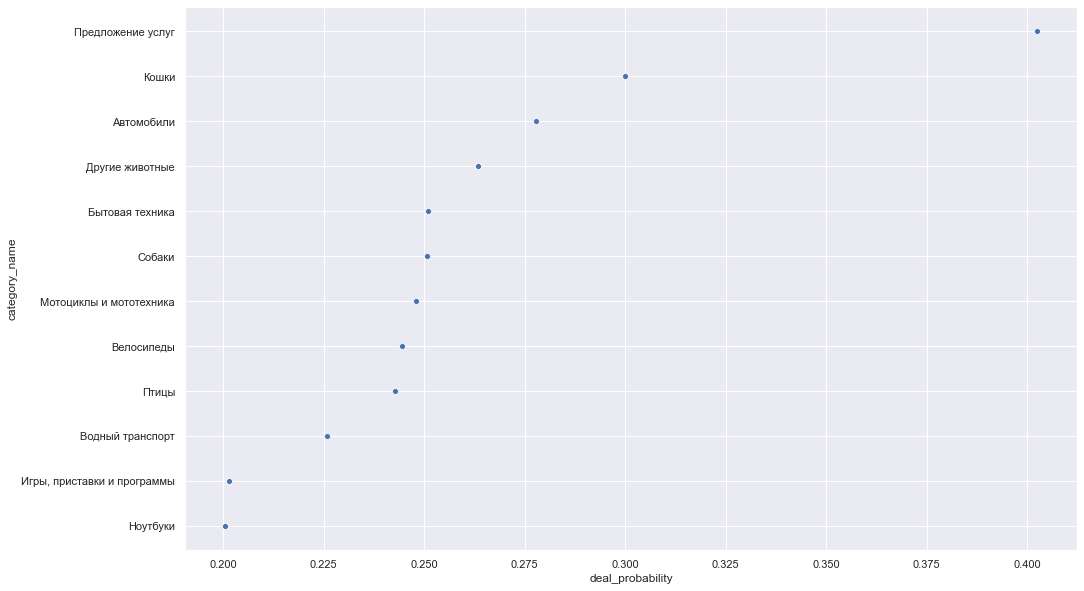

In [58]:
sns.set(rc={'figure.figsize': (16, 10)})
ax = sns.scatterplot(x = 'deal_probability', y = 'category_name', data = deal_category_more,
                 palette ='plasma_r', ci = False)

CITY

In [59]:
#averages by city
deal_probability_city=avito.groupby(['city'])['deal_probability'].mean()
deal_probability_city=deal_probability_city.sort_values().reset_index()

In [60]:
deal_probability_city

,city,deal_probability
0,Баговская,0.000000
1,Свободы,0.000000
2,Нижнетроицкий,0.000000
3,Роговатое,0.000000
4,Кама,0.000000
...,...,...
1698,Матмасы,0.737600
1699,Воля,0.739015
1700,Новая Таволжанка,0.740430
1701,Орловка,0.785010


In [61]:
#deal prob more than 0.5
deal_city_more=deal_probability_city[deal_probability_city['deal_probability']>=0.5]

In [62]:
deal_city_more

,city,deal_probability
1692,Скородное,0.524817
1693,Грахово,0.527495
1694,Лог,0.528410
1695,Бурлацкое,0.571207
1696,Быстрогорский,0.595410
1697,Виля,0.737600
1698,Матмасы,0.737600
1699,Воля,0.739015
1700,Новая Таволжанка,0.740430
1701,Орловка,0.785010


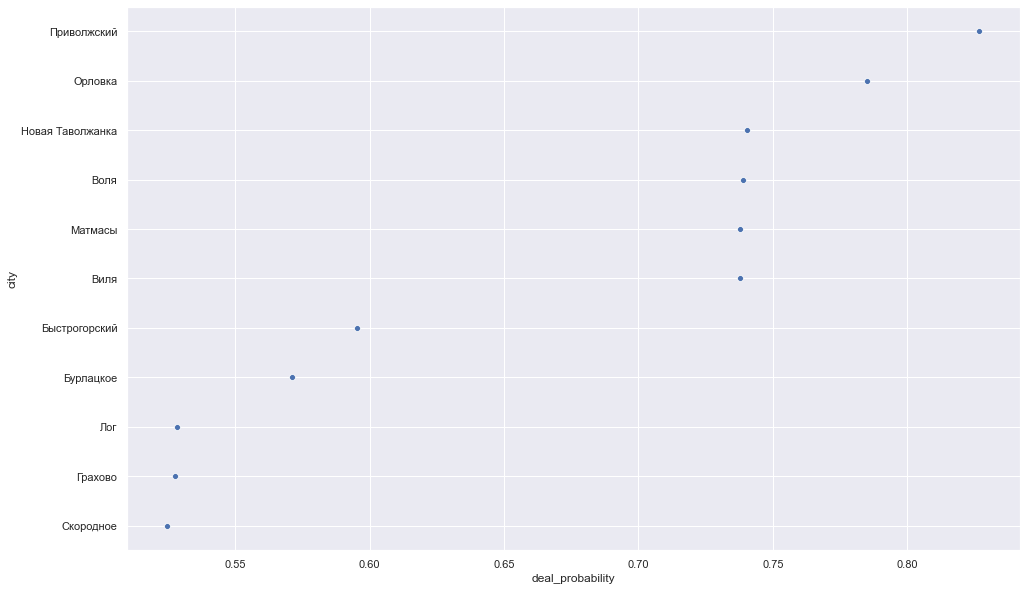

In [63]:
sns.set(rc={'figure.figsize': (16, 10)})
ax = sns.scatterplot(x = 'deal_probability', y = 'city', data = deal_city_more,
                 palette ='plasma_r', ci = False)

USER

In [64]:
deal_probability_user_type=avito.groupby(['user_type'])['deal_probability'].mean()
deal_probability_user_type=deal_probability_user_type.sort_values().reset_index()

In [65]:
deal_probability_user_type

,user_type,deal_probability
0,Shop,0.062504
1,Company,0.124623
2,Private,0.149362


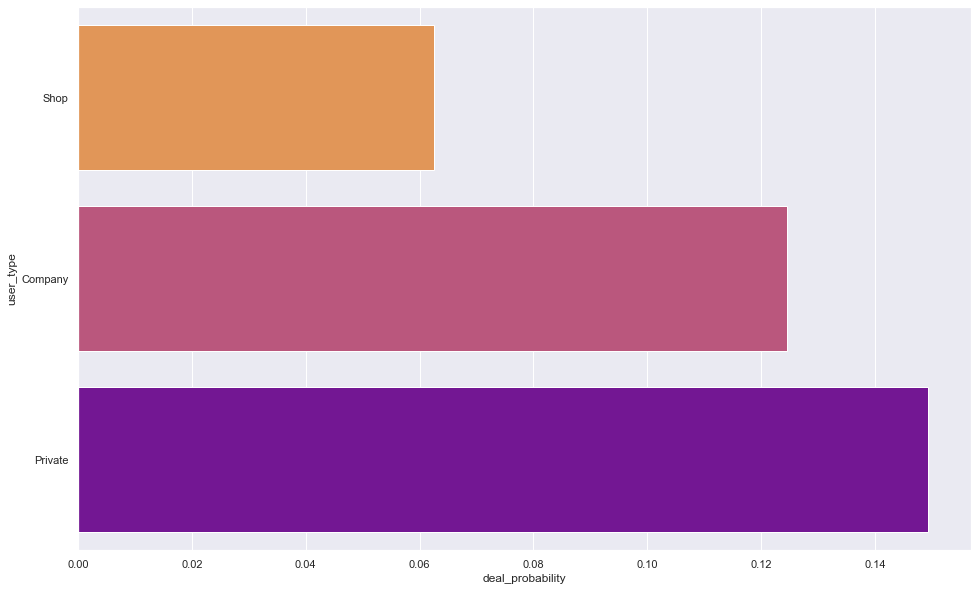

In [66]:
sns.set(rc={'figure.figsize': (16, 10)})
ax = sns.barplot(x = 'deal_probability', y = 'user_type', data = deal_probability_user_type,
                 palette ='plasma_r', ci = False)

In [67]:
deal_probability_price=avito.groupby(['price'])['deal_probability'].mean()
deal_probability_price=deal_probability_price.sort_values().reset_index()

In [68]:
deal_probability_price_more=deal_probability_price[deal_probability_price['deal_probability']>=0.5]
min(deal_probability_price_more['price'])

177.0

In [69]:
max(deal_probability_price_more['price'])

99999999.0

In [70]:
deal_probability_price_more.describe()

,price,deal_probability
count,1.600000e+02,160.000000
mean,1.540219e+06,0.701079
std,9.658515e+06,0.104625
min,1.770000e+02,0.500000
25%,1.541600e+04,0.618781
50%,1.703995e+05,0.737600
75%,4.016000e+05,0.767860
max,1.000000e+08,1.000000


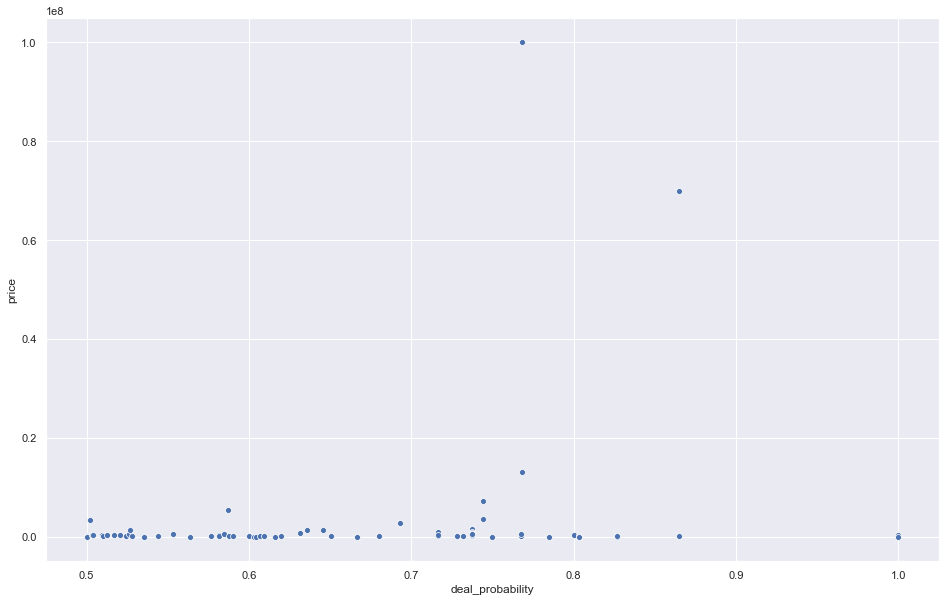

In [71]:
sns.scatterplot(x='deal_probability', y='price', data=deal_probability_price_more)

In [72]:
#1 out of 3
avito['param_1'].notnull().sum()

1005862

In [73]:
avito[avito['param_1'].notnull()]['deal_probability'].mean()

0.13812120743203343

In [74]:
avito[avito['param_1'].isnull()]['deal_probability'].mean()

0.1602398225364643

In [75]:
#2 out of 3
avito['param_2'].notnull().sum()

591604

In [76]:
avito[avito['param_2'].notnull()]['deal_probability'].mean()

0.11530900161256516

In [77]:
avito[avito['param_2'].isnull()]['deal_probability'].mean()

0.16972177862490181

In [78]:
#3 out of 3
avito['param_3'].notnull().sum()

447054

In [79]:
avito[avito['param_3'].notnull()]['deal_probability'].mean()

0.09128686697803844

In [80]:
avito[avito['param_3'].isnull()]['deal_probability'].mean()

0.17449937485141834

Chi TESTING

In [81]:
avito.crosstab(merged['param_1'], merged['deal_probability']) 
observed = pavito.crosstab(merged['param_1'], merged['deal_probability']) 
chi2_contingency(observed)

AttributeError: 'DataFrame' object has no attribute 'crosstab'

T-TESTING

PARAM 1

In [40]:
#the pvalue is too low therefore the null hypothesis gets "rejected"
stats.ttest_ind(avito[avito['param_1'].notnull()]['deal_probability'], avito[avito['param_1'].isnull()]['deal_probability'], equal_var=False)

Ttest_indResult(statistic=-17.164183423475794, pvalue=7.870320512801951e-66)

PARAM 2

In [41]:
#pvalue shows high significance
stats.ttest_ind(avito[avito['param_2'].notnull()]['deal_probability'], avito[avito['param_2'].isnull()]['deal_probability'], equal_var=False)

Ttest_indResult(statistic=-104.37619924361064, pvalue=0.0)

PARAM 3

In [42]:
#pvalue shows high significance
stats.ttest_ind(avito[avito['param_3'].notnull()]['deal_probability'], avito[avito['param_3'].isnull()]['deal_probability'], equal_var=False)

Ttest_indResult(statistic=-172.06945593409404, pvalue=0.0)

PRICE of more than 100000 and less than 100000

In [43]:
stats.ttest_ind(avito[avito['price']>=100000]['deal_probability'], avito[avito['price']<=99999]['deal_probability'], equal_var=False)

Ttest_indResult(statistic=15.513706742069179, pvalue=3.039640861565235e-54)

Parent Category Name

In [44]:
stats.ttest_ind(avito[avito['parent_category_name']== 'услуги']['deal_probability'], avito[avito['parent_category_name']== 'личные вещи']['deal_probability'], equal_var=False)

Ttest_indResult(statistic=nan, pvalue=nan)

In [45]:
stats.ttest_ind(avito[avito['category_name']== 'предложение услуг']['deal_probability'], avito[avito['category_name']== 'птицы']['deal_probability'], equal_var=False)

Ttest_indResult(statistic=nan, pvalue=nan)

RANDOM SAMPLE

In [46]:
random_avito=avito.sample(n=10000)
random_avito

,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,activation_date,user_type,deal_probability
483377,Волгоградская область,Ленинск,Бытовая электроника,Товары для компьютера,Клавиатуры и мыши,NaN,NaN,Мышка игровая,"Продаю мышку для игр,с подстветкой,с тканевым ...",450.0,3/22/2017,Private,0.24002
35897,Оренбургская область,Оренбург,Личные вещи,Детская одежда и обувь,Для девочек,Верхняя одежда,122-128 см (6-8 лет),Пальто для девочки,Пальто для девочки. Рост 130см. Б/У. В хорошем...,2000.0,3/25/2017,Private,0.00000
502737,Владимирская область,Лакинск,Личные вещи,Детская одежда и обувь,Для девочек,Верхняя одежда,50-56 cм (0-2 мес),Конверт на выиску,NaN,550.0,3/20/2017,Private,0.00000
800122,Ростовская область,Зверево,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2112,"ВАЗ 2112, 2008",машина в отличном состоянии без вложений. Торг...,139000.0,3/15/2017,Private,0.47553
438668,Самарская область,Тольятти,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Обувь,40,"Босоножки Rieker, нубук",NaN,1300.0,3/24/2017,Private,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
380121,Татарстан,Казань,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Платья и юбки,46–48 (L),Красное новое платье размер 46,NaN,2500.0,3/22/2017,Private,0.00000
242393,Самарская область,Самара,Личные вещи,Детская одежда и обувь,Для мальчиков,Комбинезоны и боди,74-80 см (7-12 мес),Вещи пакетом,"На возраст приблизительно от 6 месяцев до 1,5 ...",300.0,3/15/2017,Private,0.00000
74771,Оренбургская область,Оренбург,Для дома и дачи,Ремонт и строительство,Стройматериалы,NaN,NaN,Лист металла,Продам четыре металлических листа. Размер:1.25...,250.0,3/17/2017,Private,0.00000
586356,Оренбургская область,Оренбург,Бытовая электроника,Товары для компьютера,Комплектующие,Оперативная память,NaN,DDR3 2GB 1333MHz,.,600.0,3/18/2017,Private,0.00000


In [47]:
random_avito.to_csv('random_avito.csv')

In [48]:
random_avito

,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,activation_date,user_type,deal_probability
483377,Волгоградская область,Ленинск,Бытовая электроника,Товары для компьютера,Клавиатуры и мыши,NaN,NaN,Мышка игровая,"Продаю мышку для игр,с подстветкой,с тканевым ...",450.0,3/22/2017,Private,0.24002
35897,Оренбургская область,Оренбург,Личные вещи,Детская одежда и обувь,Для девочек,Верхняя одежда,122-128 см (6-8 лет),Пальто для девочки,Пальто для девочки. Рост 130см. Б/У. В хорошем...,2000.0,3/25/2017,Private,0.00000
502737,Владимирская область,Лакинск,Личные вещи,Детская одежда и обувь,Для девочек,Верхняя одежда,50-56 cм (0-2 мес),Конверт на выиску,NaN,550.0,3/20/2017,Private,0.00000
800122,Ростовская область,Зверево,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2112,"ВАЗ 2112, 2008",машина в отличном состоянии без вложений. Торг...,139000.0,3/15/2017,Private,0.47553
438668,Самарская область,Тольятти,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Обувь,40,"Босоножки Rieker, нубук",NaN,1300.0,3/24/2017,Private,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
380121,Татарстан,Казань,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Платья и юбки,46–48 (L),Красное новое платье размер 46,NaN,2500.0,3/22/2017,Private,0.00000
242393,Самарская область,Самара,Личные вещи,Детская одежда и обувь,Для мальчиков,Комбинезоны и боди,74-80 см (7-12 мес),Вещи пакетом,"На возраст приблизительно от 6 месяцев до 1,5 ...",300.0,3/15/2017,Private,0.00000
74771,Оренбургская область,Оренбург,Для дома и дачи,Ремонт и строительство,Стройматериалы,NaN,NaN,Лист металла,Продам четыре металлических листа. Размер:1.25...,250.0,3/17/2017,Private,0.00000
586356,Оренбургская область,Оренбург,Бытовая электроника,Товары для компьютера,Комплектующие,Оперативная память,NaN,DDR3 2GB 1333MHz,.,600.0,3/18/2017,Private,0.00000


In [49]:
random_avito.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 483377 to 876599
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   region                10000 non-null  object 
 1   city                  10000 non-null  object 
 2   parent_category_name  10000 non-null  object 
 3   category_name         10000 non-null  object 
 4   param_1               9585 non-null   object 
 5   param_2               5598 non-null   object 
 6   param_3               4241 non-null   object 
 7   title                 10000 non-null  object 
 8   description           9195 non-null   object 
 9   price                 9406 non-null   float64
 10  activation_date       10000 non-null  object 
 11  user_type             10000 non-null  object 
 12  deal_probability      10000 non-null  float64
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [50]:
deal_probability_region_random=random_avito.groupby(['region'])['deal_probability'].mean()
deal_probability_region_random=deal_probability_region_random.sort_values().reset_index()

In [51]:
deal_probability_region_random

,region,deal_probability
0,Тюменская область,0.112028
1,Свердловская область,0.119801
2,Кемеровская область,0.121333
3,Калининградская область,0.123441
4,Тульская область,0.125125
5,Красноярский край,0.126550
6,Воронежская область,0.127314
7,Ярославская область,0.128480
8,Нижегородская область,0.132209
9,Ростовская область,0.132796
